In [1]:
# Cell 1: Imports and Setup
"""
Initial Data Exploration - UCI Online Retail Dataset
==================================================

This notebook provides the first comprehensive look at our dataset,
including basic statistics, data quality assessment, and initial insights.

Author: [Your Name]
Date: [Current Date]
Dataset: UCI Online Retail II (1,067,371 records)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🔄 Loading UCI Online Retail Dataset...")

🔄 Loading UCI Online Retail Dataset...


In [7]:
# Cell 2: Load Data
# Load the dataset
#data_path = Path('home/gaurav/data-engineering-capstone/data/raw/online_retail_ii.parquet')
#df = pd.read_parquet(data_path)
df = pd.read_csv('../../data/raw/online_retail_ii.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

✅ Dataset loaded successfully!
📊 Shape: (541909, 8)
💾 Memory usage: 175.2 MB


In [8]:
# Cell 3: Basic Dataset Information
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"Records: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Countries: {df['Country'].nunique()}")
print(f"Unique Customers: {df['CustomerID'].nunique()}")
print(f"Unique Products: {df['StockCode'].nunique()}")

# Display column information
print("\n📊 COLUMN INFORMATION")
print("=" * 50)
print(df.info())

📋 DATASET OVERVIEW
Records: 541,909
Columns: 8
Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Countries: 38
Unique Customers: 4372
Unique Products: 4070

📊 COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [9]:
# Cell 4: First Look at Data
print("\n👀 FIRST 5 RECORDS")
print("=" * 50)
display(df.head())

print("\n📈 BASIC STATISTICS")
print("=" * 50)
display(df.describe(include='all'))


👀 FIRST 5 RECORDS


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



📈 BASIC STATISTICS


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [10]:
# Cell 5: Data Quality Assessment
print("\n🔍 DATA QUALITY ASSESSMENT")
print("=" * 50)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

quality_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values.values,
    'Missing %': missing_percentage.values,
    'Data Type': df.dtypes.values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

display(quality_df)


🔍 DATA QUALITY ASSESSMENT


,Column,Missing Count,Missing %,Data Type,Unique Values
0,InvoiceNo,0,0.000000,object,25900
1,StockCode,0,0.000000,object,4070
2,Description,1454,0.268311,object,4223
3,Quantity,0,0.000000,int64,722
4,InvoiceDate,0,0.000000,object,23260
5,UnitPrice,0,0.000000,float64,1630
6,CustomerID,135080,24.926694,float64,4372
7,Country,0,0.000000,object,38


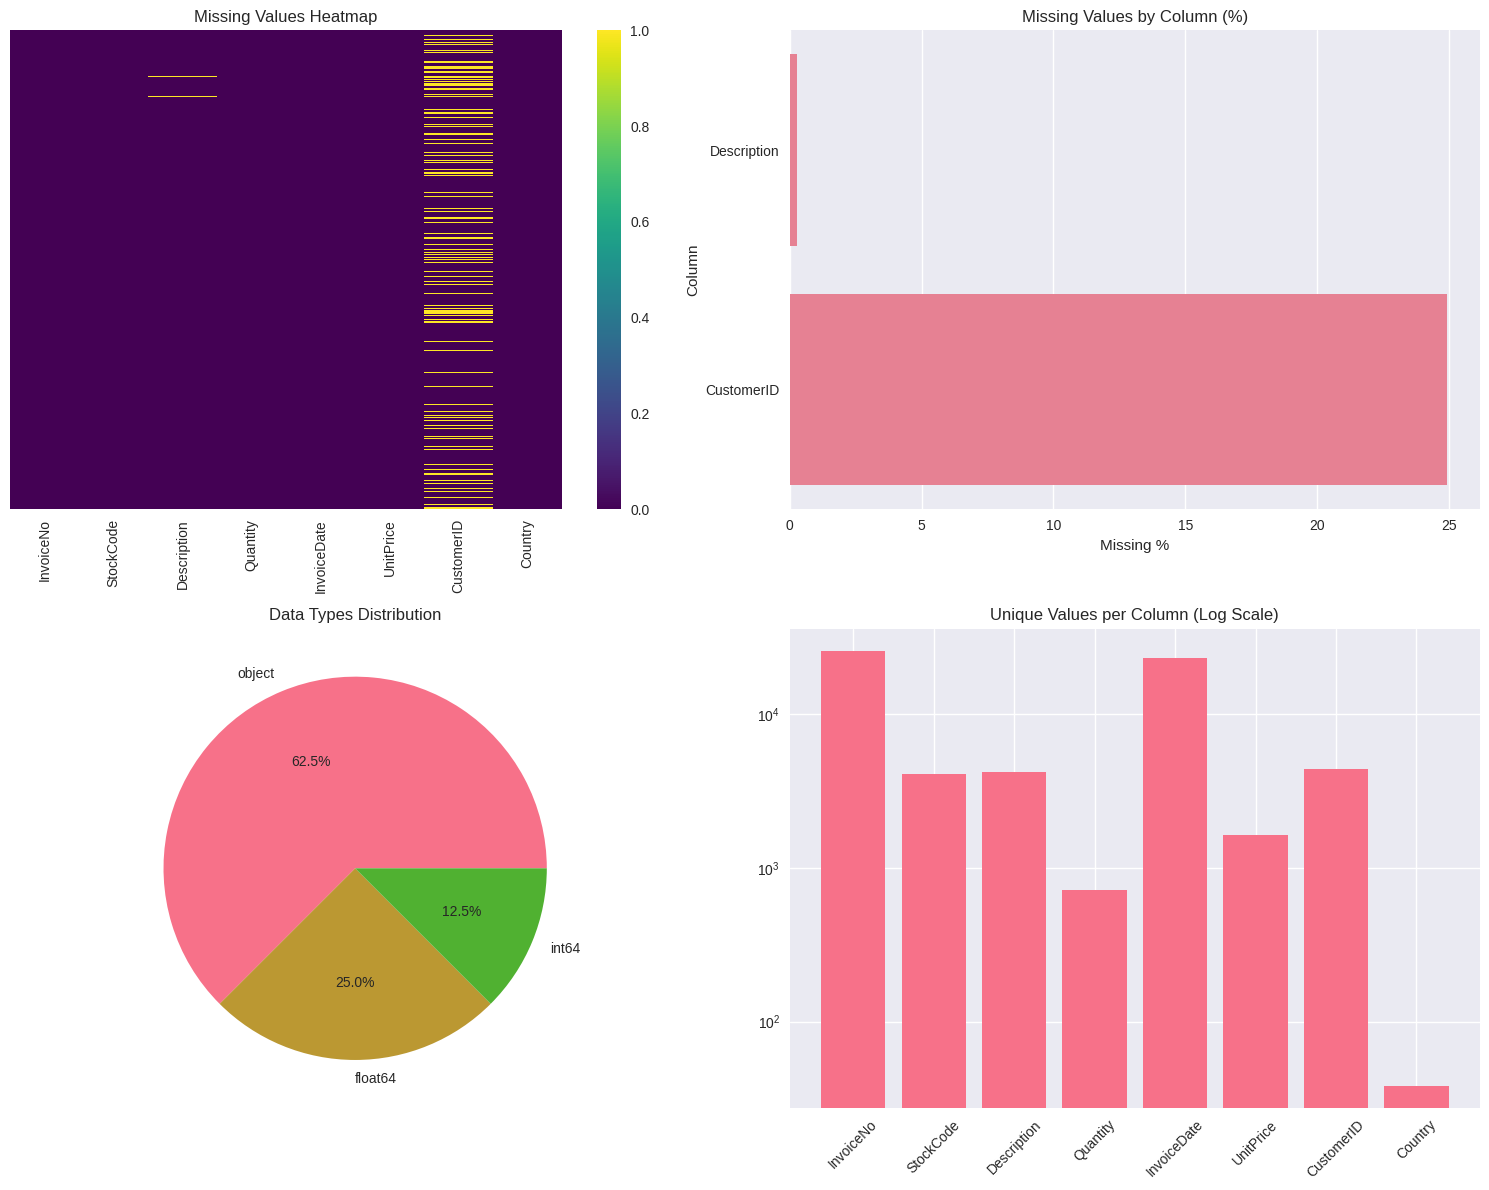

In [11]:
# Cell 6: Data Quality Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Missing values heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0,0])
axes[0,0].set_title('Missing Values Heatmap')

# Missing values by column
missing_data = quality_df[quality_df['Missing Count'] > 0]
if not missing_data.empty:
    sns.barplot(data=missing_data, x='Missing %', y='Column', ax=axes[0,1])
    axes[0,1].set_title('Missing Values by Column (%)')
else:
    axes[0,1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('Missing Values by Column (%)')

# Data types distribution
dtype_counts = df.dtypes.value_counts()
axes[1,0].pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Data Types Distribution')

# Unique values distribution (log scale)
unique_vals = quality_df['Unique Values'].values
axes[1,1].bar(quality_df['Column'], unique_vals)
axes[1,1].set_yscale('log')
axes[1,1].set_title('Unique Values per Column (Log Scale)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [13]:
# Cell 7: Business Insights - Revenue Analysis
print("\n💰 BUSINESS INSIGHTS")
print("=" * 50)

# Create revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Revenue statistics
total_revenue = df['Revenue'].sum()
avg_order_value = df.groupby('InvoiceNo')['Revenue'].sum().mean()

print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Average Order Value: £{avg_order_value:.2f}")
print(f"Revenue per Transaction: £{df['Revenue'].mean():.2f}")

# Top countries by revenue
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
print(f"\n🌍 TOP 10 COUNTRIES BY REVENUE")
print("=" * 30)
for country, revenue in top_countries.items():
    print(f"{country}: £{revenue:,.2f}")


💰 BUSINESS INSIGHTS
Total Revenue: £9,747,747.93
Average Order Value: £376.36
Revenue per Transaction: £17.99

🌍 TOP 10 COUNTRIES BY REVENUE
United Kingdom: £8,187,806.36
Netherlands: £284,661.54
EIRE: £263,276.82
Germany: £221,698.21
France: £197,403.90
Australia: £137,077.27
Switzerland: £56,385.35
Spain: £54,774.58
Belgium: £40,910.96
Sweden: £36,595.91



📅 TEMPORAL ANALYSIS


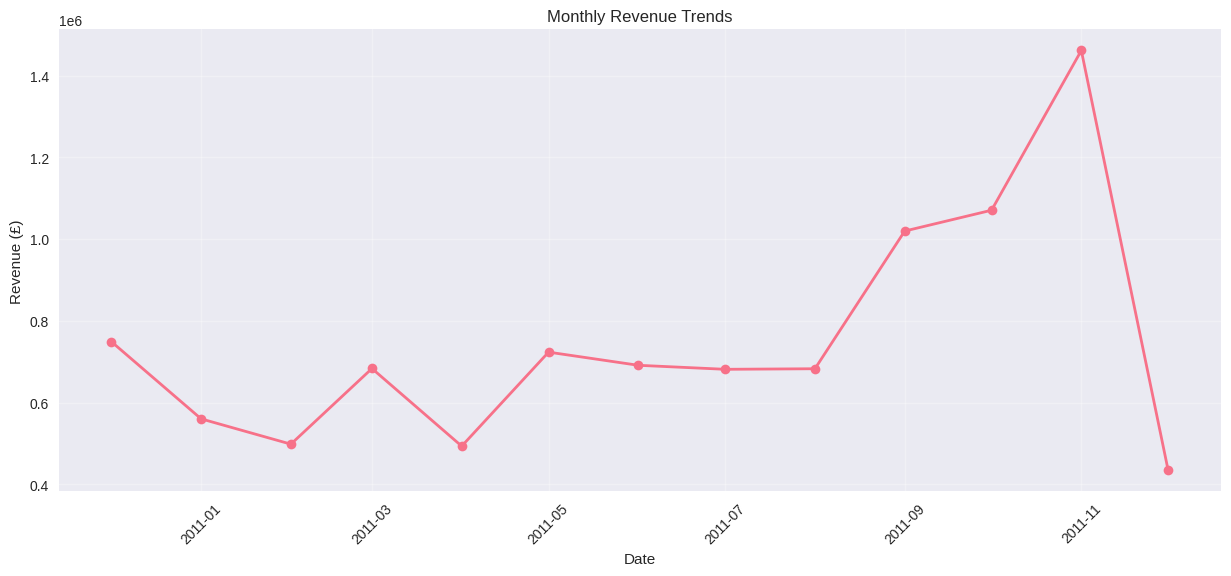

In [14]:
# Cell 8: Temporal Analysis
print("\n📅 TEMPORAL ANALYSIS")
print("=" * 50)

# Convert InvoiceDate to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['InvoiceDate']):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract time components
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Monthly revenue trends
monthly_revenue = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(15, 6))
plt.plot(monthly_revenue['Date'], monthly_revenue['Revenue'], marker='o', linewidth=2)
plt.title('Monthly Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# Cell 9: Customer Analysis
print("\n👥 CUSTOMER ANALYSIS")
print("=" * 50)

# Customer statistics (excluding null CustomerID)
customer_data = df[df['CustomerID'].notna()]

customers_per_country = customer_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
revenue_per_customer = customer_data.groupby('CustomerID')['Revenue'].sum()

print(f"Total Customers: {customer_data['CustomerID'].nunique():,}")
print(f"Average Revenue per Customer: £{revenue_per_customer.mean():.2f}")
print(f"Median Revenue per Customer: £{revenue_per_customer.median():.2f}")

# Top customers
top_customers = revenue_per_customer.sort_values(ascending=False).head(10)
print(f"\n💎 TOP 10 CUSTOMERS BY REVENUE")
print("=" * 30)
for customer_id, revenue in top_customers.items():
    print(f"Customer {customer_id}: £{revenue:,.2f}")


👥 CUSTOMER ANALYSIS
Total Customers: 4,372
Average Revenue per Customer: £1898.46
Median Revenue per Customer: £648.08

💎 TOP 10 CUSTOMERS BY REVENUE
Customer 14646.0: £279,489.02
Customer 18102.0: £256,438.49
Customer 17450.0: £187,482.17
Customer 14911.0: £132,572.62
Customer 12415.0: £123,725.45
Customer 14156.0: £113,384.14
Customer 17511.0: £88,125.38
Customer 16684.0: £65,892.08
Customer 13694.0: £62,653.10
Customer 15311.0: £59,419.34


In [16]:
# Cell 10: Product Analysis
print("\n📦 PRODUCT ANALYSIS")
print("=" * 50)

# Product statistics
product_revenue = df.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False)
product_quantity = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

print(f"Total Products: {df['StockCode'].nunique():,}")
print(f"Products with Description: {df[df['Description'].notna()]['StockCode'].nunique():,}")

# Top products by revenue
top_products_revenue = product_revenue.head(10)
print(f"\n🏆 TOP 10 PRODUCTS BY REVENUE")
print("=" * 30)
for stock_code, revenue in top_products_revenue.items():
    description = df[df['StockCode'] == stock_code]['Description'].iloc[0] if not df[df['StockCode'] == stock_code]['Description'].isna().all() else 'No Description'
    print(f"{stock_code} ({description[:30]}...): £{revenue:,.2f}")


📦 PRODUCT ANALYSIS
Total Products: 4,070
Products with Description: 3,958

🏆 TOP 10 PRODUCTS BY REVENUE
DOT (DOTCOM POSTAGE...): £206,245.48
22423 (REGENCY CAKESTAND 3 TIER...): £164,762.19
47566 (PARTY BUNTING...): £98,302.98
85123A (WHITE HANGING HEART T-LIGHT HO...): £97,894.50
85099B (JUMBO BAG RED RETROSPOT...): £92,356.03
23084 (RABBIT NIGHT LIGHT...): £66,756.59
POST (POSTAGE...): £66,230.64
22086 (PAPER CHAIN KIT 50'S CHRISTMAS...): £63,791.94
84879 (ASSORTED COLOUR BIRD ORNAMENT...): £58,959.73
79321 (CHILLI LIGHTS...): £53,768.06


In [17]:
# Cell 11: Data Quality Issues and Next Steps
print("\n🔧 DATA QUALITY ISSUES IDENTIFIED")
print("=" * 50)

issues = []

# Check for negative quantities
negative_qty = (df['Quantity'] < 0).sum()
if negative_qty > 0:
    issues.append(f"Negative quantities: {negative_qty:,} records ({negative_qty/len(df)*100:.1f}%)")

# Check for zero/negative prices
zero_price = (df['UnitPrice'] <= 0).sum()
if zero_price > 0:
    issues.append(f"Zero/negative prices: {zero_price:,} records ({zero_price/len(df)*100:.1f}%)")

# Check for missing customer IDs
missing_customers = df['CustomerID'].isna().sum()
if missing_customers > 0:
    issues.append(f"Missing customer IDs: {missing_customers:,} records ({missing_customers/len(df)*100:.1f}%)")

# Check for missing descriptions
missing_descriptions = df['Description'].isna().sum()
if missing_descriptions > 0:
    issues.append(f"Missing descriptions: {missing_descriptions:,} records ({missing_descriptions/len(df)*100:.1f}%)")

if issues:
    for issue in issues:
        print(f"⚠️  {issue}")
else:
    print("✅ No major data quality issues detected!")

print(f"\n📋 NEXT STEPS")
print("=" * 50)
print("1. 🧹 Data Cleaning: Handle missing values and outliers")
print("2. 🏗️  Data Modeling: Design staging and warehouse schemas")
print("3. 🔄 ETL Pipeline: Build automated data ingestion")
print("4. 📊 Analytics: Create business dashboards")
print("5. 🤖 ML Models: Develop predictive models")


🔧 DATA QUALITY ISSUES IDENTIFIED
⚠️  Negative quantities: 10,624 records (2.0%)
⚠️  Zero/negative prices: 2,517 records (0.5%)
⚠️  Missing customer IDs: 135,080 records (24.9%)
⚠️  Missing descriptions: 1,454 records (0.3%)

📋 NEXT STEPS
1. 🧹 Data Cleaning: Handle missing values and outliers
2. 🏗️  Data Modeling: Design staging and warehouse schemas
3. 🔄 ETL Pipeline: Build automated data ingestion
4. 📊 Analytics: Create business dashboards
5. 🤖 ML Models: Develop predictive models


In [18]:
# Cell 12: Save Exploration Summary
print("\n💾 SAVING EXPLORATION SUMMARY")
print("=" * 50)

# Create summary statistics
summary_stats = {
    'dataset_shape': df.shape,
    'total_records': len(df),
    'date_range': [str(df['InvoiceDate'].min()), str(df['InvoiceDate'].max())],
    'total_revenue': float(df['Revenue'].sum()),
    'unique_customers': int(df['CustomerID'].nunique()),
    'unique_products': int(df['StockCode'].nunique()),
    'countries': int(df['Country'].nunique()),
    'data_quality_issues': len(issues),
    'missing_values': missing_values.to_dict()
}

# Save summary to JSON
import json
summary_path = Path('../../data/staging/exploration_summary.json')
summary_path.parent.mkdir(parents=True, exist_ok=True)

with open(summary_path, 'w') as f:
    json.dump(summary_stats, f, indent=2, default=str)

print(f"✅ Summary saved to: {summary_path}")
print("🎉 Initial data exploration completed!")


💾 SAVING EXPLORATION SUMMARY
✅ Summary saved to: ../../data/staging/exploration_summary.json
🎉 Initial data exploration completed!
